In [23]:
import numpy
import math
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision.transforms import Compose, Resize, ToTensor
from torch.utils.data import DataLoader, random_split

from dataset import DogDataset

# Loading data set

In [24]:
dog_dataset_dir = "Dataset"
transform_for_unet = Compose([
    Resize((572,572)),
    ToTensor(),
])

dog_dataset = DogDataset(dataset_dir=dog_dataset_dir, transform=transform_for_unet)
print("Length of dataset: ", len(dog_dataset))




Length of dataset:  180


# Dividing data into train and test sets

Test dataset length:  54
Train dataset length:  126
Feature batch shape: torch.Size([64, 3, 572, 572])
Labels batch shape: torch.Size([64, 1, 572, 572])


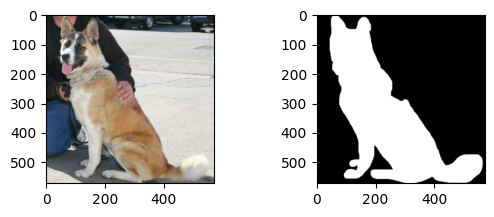

In [ ]:
train_data_length = math.ceil(0.7 * len(dog_dataset))
test_data_length = len(dog_dataset) - train_data_length

train_data, test_data = random_split(dog_dataset, [train_data_length, test_data_length])

print("Test dataset length: ", len(test_data))
print("Train dataset length: ", len(train_data))

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

data_imges, label_imges = next(iter(train_dataloader))
print(f"Data batch shape: {data_imges.size()}")
print(f"Labels batch shape: {label_imges.size()}")

data_img = data_imges[0].permute(1, 2, 0).numpy()
label_img = label_imges[0].squeeze()

figure = plt.figure()
ax1 = figure.add_subplot(2,2,1)
ax1.imshow(data_img)
ax2 = figure.add_subplot(2,2,2)
ax2.imshow(label_img, cmap="gray")
plt.show()

# Model creation